## 파이썬 기본 - 파일 입출력

### 학습 내용 및 목표
 * 기본적으로 파일을 읽어오고 쓰는 것을 실습을 통해 이해합니다.
 * 파일을 읽어올 때, 모드에 대해 알아봅니다.
 * 실제로 이미지를 복사하는 기능을 프로그램을 작성해 봅니다.

### 1-1 파일 읽기 알아보기

* 파일의 종류
  * 텍스트 파일 : 사림이 읽을 수 있는 텍스트로 구성된 파일.
    * 소스코드 파일(.py, .c), README.txt 등
  * 이진 파일 : 사람이 읽을 수 없으나, 컴퓨터는 읽을 수 있는 파일
    * 모든 파일은 0과 1로 이루어져 있음.
    * binary파일이라고 부르기도 함.
    * 이미지 파일(.png, .jpg), 데이터 파일(.dat), 실행파일(.exe) 등

### 파일 관련 함수

* open()함수로 파일을 불러온다.
* read()함수로 파일의 내용을 읽는다.
* close()함수로 파일을 닫는다.

### 사전 준비
 * text01.txt를 만들어본다. 인코딩 방식은 ANSI로 한다.(Window의 경우)
 * 내용 : 안녕하세요!

In [ ]:
var = open('text01.txt', 'r', encoding='euc-kr')
var

<_io.TextIOWrapper name='text01.txt' mode='r' encoding='cp949'>

In [ ]:
doc = var.read()
print(doc)

안녕하세요!
반갑습니다.


In [ ]:
var.close()  # 파일 닫기

### with open() : 자동으로 열고 닫기

In [1]:
# with open()으로 파일 열기
with open('text01.txt', 'r', encoding='euc-kr') as f:
    content = f.read()
    print(content)

# 여기서는 자동으로 닫힘! close() 필요 없음

안녕하세요!
반갑습니다.


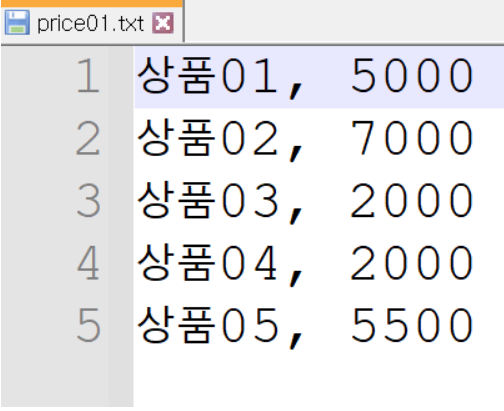

In [ ]:
from IPython.display import display, Image

display(Image(filename="price01_txt.png"))

### 실습해보기
 * 위와 같은 값을 가지는 텍스트를 작성 후, 이를 열고, 내용을 확인해 보자.

In [ ]:
file = open('text01.txt', 'r', encoding='euc-kr')
doc = file.read()
print(doc)
file.close()

상품01, 5000
상품02, 7000
상품03, 2000
상품04, 2000
상품05, 5500


### open() 함수 상세
 * open("파일경로 및 파일명", 파일모드, encoding='인코딩방식')
   * 파일경로 및 파일명 : 파일이 있는 위치
   * 파일모드(읽기, 쓰기, 추가) : r(읽기), w(추가), a(추가)
   * 파일모드(읽기, 쓰기, 추가) : rb(읽기), wb(추가), ab(추가) <- 이진파일의 경우 (b)를 추가
   * 인코딩 방식 - utf-8(다국어), euc-kr(한국어지원), ASCII, UTF-16등

* open()함수에서 만약 아래와 같은 에러 발생시(한글이 포함될 경우가 많음),
  * UnicodeDecodeError: 'cp949' codec can't decode byte 0xec in position 0: illegal multibyte sequence
  * (방법 1) 메모장에서 text 파일의 인코딩 방식을 ANSI로 변환 후, 진행한다.
  * (방법 2) 파일을 불러올 때, 인코딩 방식을 utf-8로 지정 후, 불러온다.

* read() 함수는 전체 문자열 읽기
* readline() 함수는 한줄씩 읽기

### 방법1 - 파일 변환 후, 불러오기

In [ ]:
file = open("price01_utf8.txt", "r", encoding='utf-8')

s = file.readline()
print(s, end='')
s = file.readline()
print(s, end='')
s = file.readline()
print(s, end='')
file.close()

상품01, 5000
상품02, 7000
상품03, 2000


### 방법 2 - encoding를 지정하여 사용하기

In [ ]:
file = open("price01.txt", "r", encoding='euc-kr')
s = file.readline()
print(s, end='')
s = file.readline()
print(s, end='')
s = file.readline()
print(s, end='')
file.close()

상품01, 5000
상품02, 7000
상품03, 2000


### while문을 이용하여 마지막 줄까지 읽기.

In [ ]:
file = open("price01.txt", "r", encoding='euc-kr')
line = file.readline()

while line != "":  # 파일 내용이 있으면. 다음줄 읽기
    print(line, end='')
    line = file.readline()

file.close()

상품01, 5000
상품02, 7000
상품03, 2000
상품04, 2000
상품05, 5500

### 길이를 구하는 len() 함수 알아보기

In [ ]:
s = "안녕하세요! 오늘도 화이팅입니다."
print(len(s)) # len() 함수는 문자열의 길이를 알아보는 것이다.

18


### 프로그램 업그레이드
 * 위에서 만든 프로그램에 각 행의 길이를 출력하는 기능을 추가해 보자.

In [ ]:
file = open("price01.txt", "r", encoding='euc-kr')
line = file.readline()

while line != "":  # 파일 내용이 있으면. 다음줄 읽기
    print("행의 길이:", len(line) )
    print("행의 내용:", line, end='')  # line이 줄바꿈도 포함하고 있어, 'end' 매개변수에서는 따로 지정 안함.
    line = file.readline()

file.close()

행의 길이: 11
행의 내용: 상품01, 5000
행의 길이: 11
행의 내용: 상품02, 7000
행의 길이: 11
행의 내용: 상품03, 2000
행의 길이: 11
행의 내용: 상품04, 2000
행의 길이: 10
행의 내용: 상품05, 5500

* read() : 전체 읽기
* readline() : 한줄씩 읽기
* readlines() : 전체 줄을 읽어, 이를 리스트에 저장해 둔다.

In [ ]:
file = open("price01.txt", "r", encoding='euc-kr')
lines = file.readlines()

print( type(lines) )

<class 'list'>


In [ ]:
# 저장된 리스트 내용에 이를 하나씩 불러와서 출력
for i in lines:
    print(i, end='')

file.close()

상품01, 5000
상품02, 7000
상품03, 2000
상품04, 2000
상품05, 5500

### 1-2 파일 쓰기 함수 - write() 함수
 * 단계1 : open()로 파일 열기, 모드는 'w' 쓰기 모드로 설정
 * 단계2 : write() 함수를 이용하여 파일 쓰기가 가능하다.
 * 단계3 : close() 함수로 파일을 닫는다.

In [ ]:
f1 = open("mydata.txt", "w")
f1.write("모니터1, 20만원")
f1.write("\n") # 줄바꿈
f1.write("키보드, 3만원")
f1.close()

### 함께 해보기
  * 나의 취미, 내가 좋아하는 과일, 내가 좋아하는 연예인 등을 몇줄로 작성해 보자.

### 1-3 응용 프로그래밍
 * 원도우 등의 파일 복사하기 기능이 있다.
 * 실제로 이미지 파일을 복사하는 프로그램을 만들어보자.

In [ ]:
file1 = 'smalldog.jpeg'
backup = "smalldog_back.jpeg"

infile = open(file1, 'rb')
outfile = open(backup, 'wb')

while True:
    copy_buffer = infile.read(1024)  # 파일을 1024바이트씩 읽는다.
    if not copy_buffer:  # 읽어올 내용이 없으면(이미지내용)
        break
    outfile.write(copy_buffer)

infile.close()
outfile.close()
print("복사완료")

복사완료


### 실습해 보기
 * 웹에서 파일을 다운로드 후, 이를 복사하는 프로그램을 만들어보자.
 * (추가) 파일 이름을 지정할 수 있도록 input() 함수를 이용해 보자.

### 생각해 보기
 * 실제로 내가 만든 파일이 생성이 되었는지 아닌지 확인할 수 있을까?